In [2]:
!pip install plotly

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 6.9 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.6 MB 11.9 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 13.2 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 13.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [5]:
data_df = pd.read_csv(r"C:\Users\luisb\Desktop\FRAUD_CREDIT_CARD\creditcard.csv")

In [6]:
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


In [7]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
temp = data_df["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

In [129]:
import plotly.graph_objs as go
import pandas as pd

# Suponiendo que ya tienes tu data_df y todo listo
temp = data_df["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index, 'values': temp.values})

trace = go.Bar(
    x=df['Class'],
    y=df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df['values']
)
layout = go.Layout(
    title='Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
    xaxis=dict(title='Class', showticklabels=True),
    yaxis=dict(title='Number of transactions'),
    hovermode='closest',
    width=600
)

fig = go.Figure(data=[trace], layout=layout)

# Guardar la figura como archivo HTML en carpeta images
fig.write_html('images/class_distribution.html')

print("Gráfico guardado en 'images/class_distribution.html'")

Gráfico guardado en 'images/class_distribution.html'


In [128]:
import matplotlib.pyplot as plt

# Crear gráfica ejemplo
plt.bar(['A', 'B'], [10, 5])
plt.title('Ejemplo gráfico')

# Guardar la imagen en la carpeta images (asegúrate que exista la carpeta)
plt.savefig('images/mi_grafico.png')
plt.close()

In [126]:
class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [130]:
import plotly.figure_factory as ff

class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig.update_layout(title='Credit Card Transactions Time Density Plot', xaxis_title='Time [s]')

# Guardar como HTML
fig.write_html('images/distplot_time_density.html')

print("Gráfica de densidad guardada en 'images/distplot_time_density.html'")

Gráfica de densidad guardada en 'images/distplot_time_density.html'


In [137]:
data_df['Hour'] = data_df['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data_df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


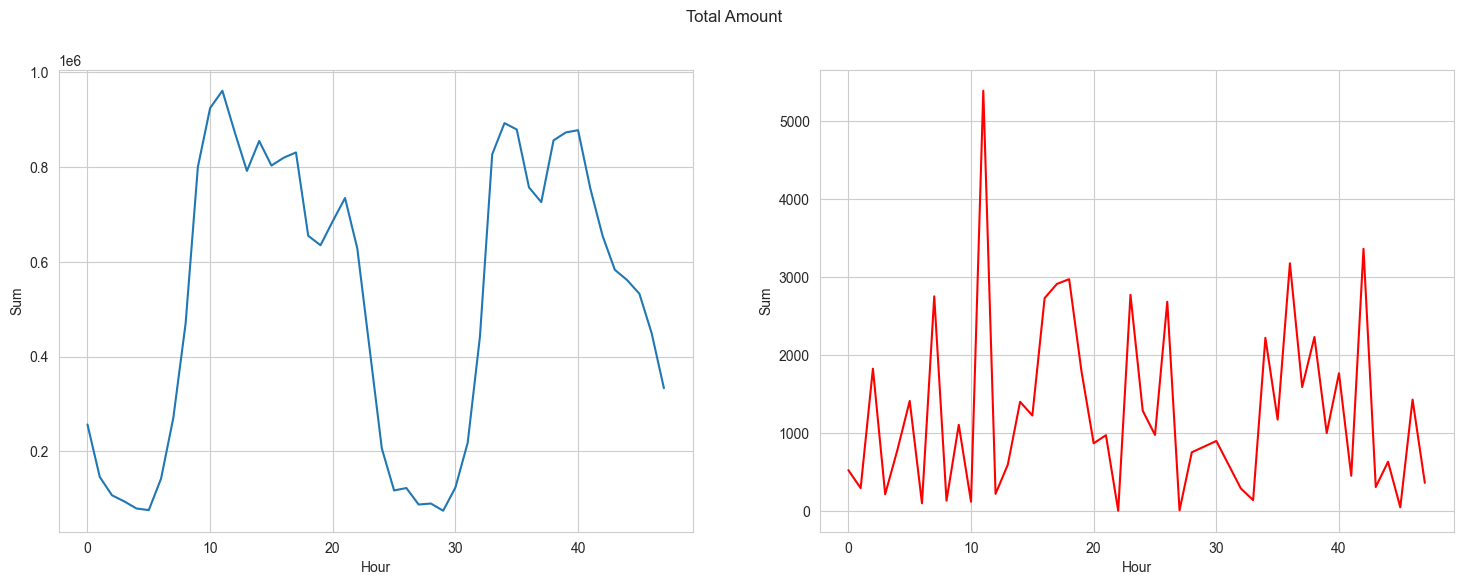

In [138]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

In [139]:
import plotly.graph_objects as go
import pandas as pd

# Suponiendo que df tiene las columnas Class, Hour, Sum (como el ejemplo anterior)
df_0 = df[df['Class'] == 0]
df_1 = df[df['Class'] == 1]

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_0['Hour'], y=df_0['Sum'], mode='lines', name='Class 0'))
fig.add_trace(go.Scatter(x=df_1['Hour'], y=df_1['Sum'], mode='lines', name='Class 1', line=dict(color='red')))

fig.update_layout(title='Total Amount',
                  xaxis_title='Hour',
                  yaxis_title='Sum')

# Guardar como archivo HTML en carpeta images (asegúrate que exista)
fig.write_html("images/total_amount_by_hour.html")

In [135]:
print(df.columns)

Index(['Class', 'values'], dtype='object')


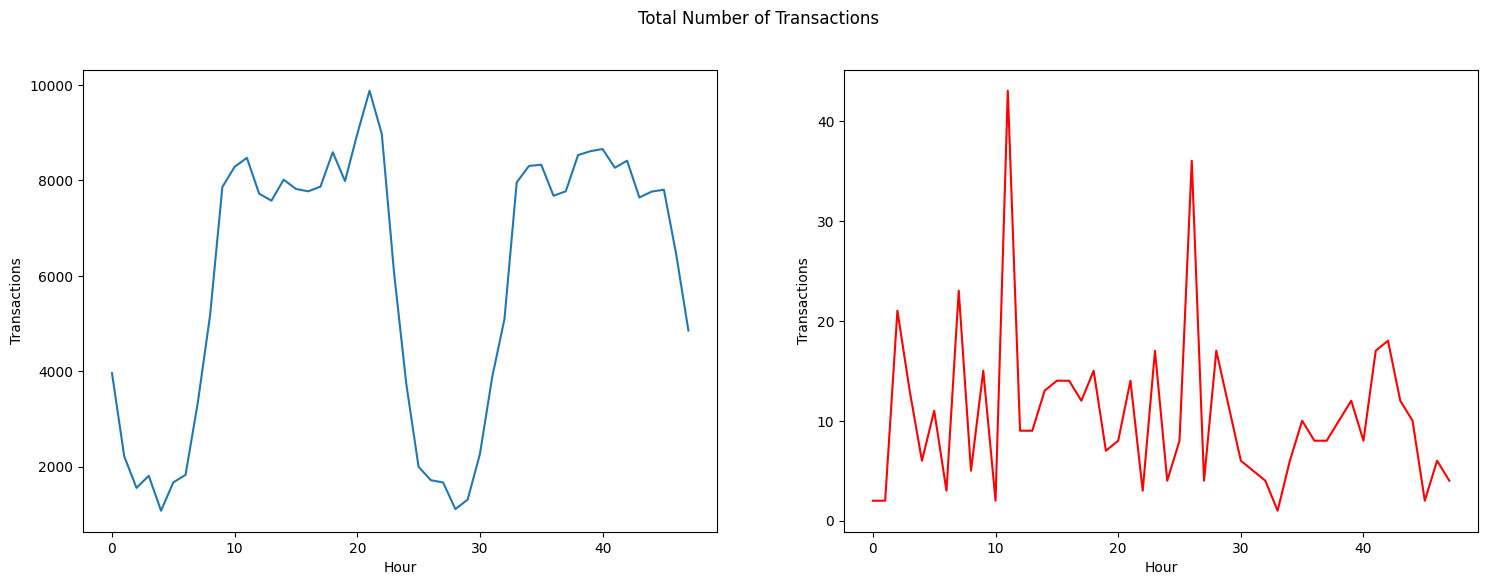

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

In [140]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.loc[df.Class==0]['Hour'], y=df.loc[df.Class==0]['Transactions'], mode='lines', name='Class 0'))
fig.add_trace(go.Scatter(x=df.loc[df.Class==1]['Hour'], y=df.loc[df.Class==1]['Transactions'], mode='lines', name='Class 1', line=dict(color='red')))
fig.update_layout(title='Total Number of Transactions', xaxis_title='Hour', yaxis_title='Transactions')

fig.write_html("images/total_transactions_by_hour.html")

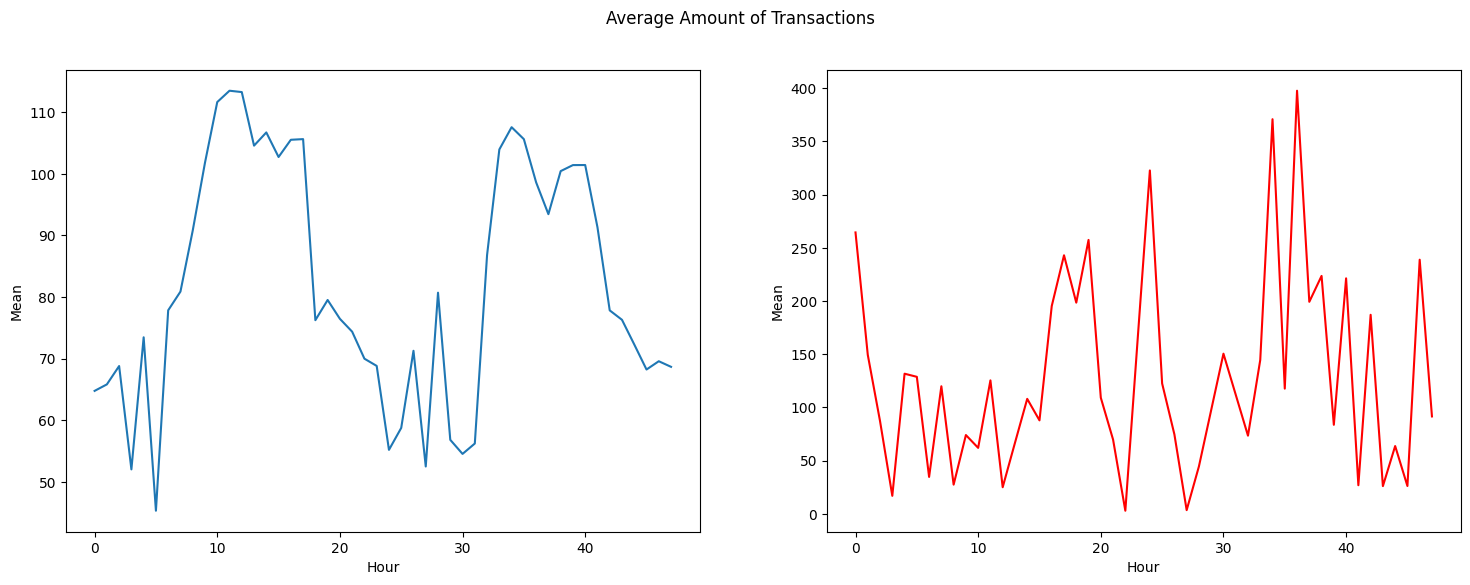

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

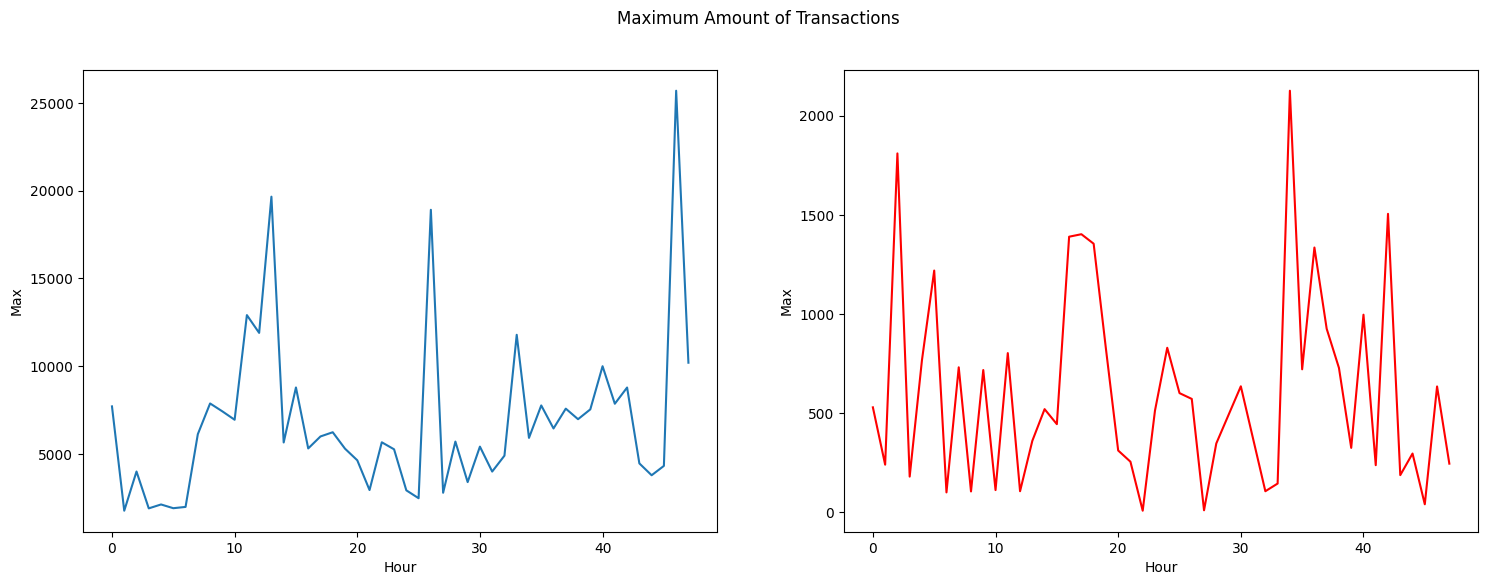

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

In [141]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear gráfico con dos columnas
fig = make_subplots(rows=1, cols=2, subplot_titles=("Class 0", "Class 1"))

# Clase 0
fig.add_trace(
    go.Scatter(x=df.loc[df.Class == 0]['Hour'], y=df.loc[df.Class == 0]['Max'],
               mode='lines', name='Class 0'),
    row=1, col=1
)

# Clase 1
fig.add_trace(
    go.Scatter(x=df.loc[df.Class == 1]['Hour'], y=df.loc[df.Class == 1]['Max'],
               mode='lines', name='Class 1', line=dict(color='red')),
    row=1, col=2
)

# Configurar diseño general
fig.update_layout(
    title_text="Maximum Amount of Transactions",
    height=500,
    width=1000,
    showlegend=False
)

# Guardar como HTML
fig.write_html("images/maximum_amount_by_class.html")

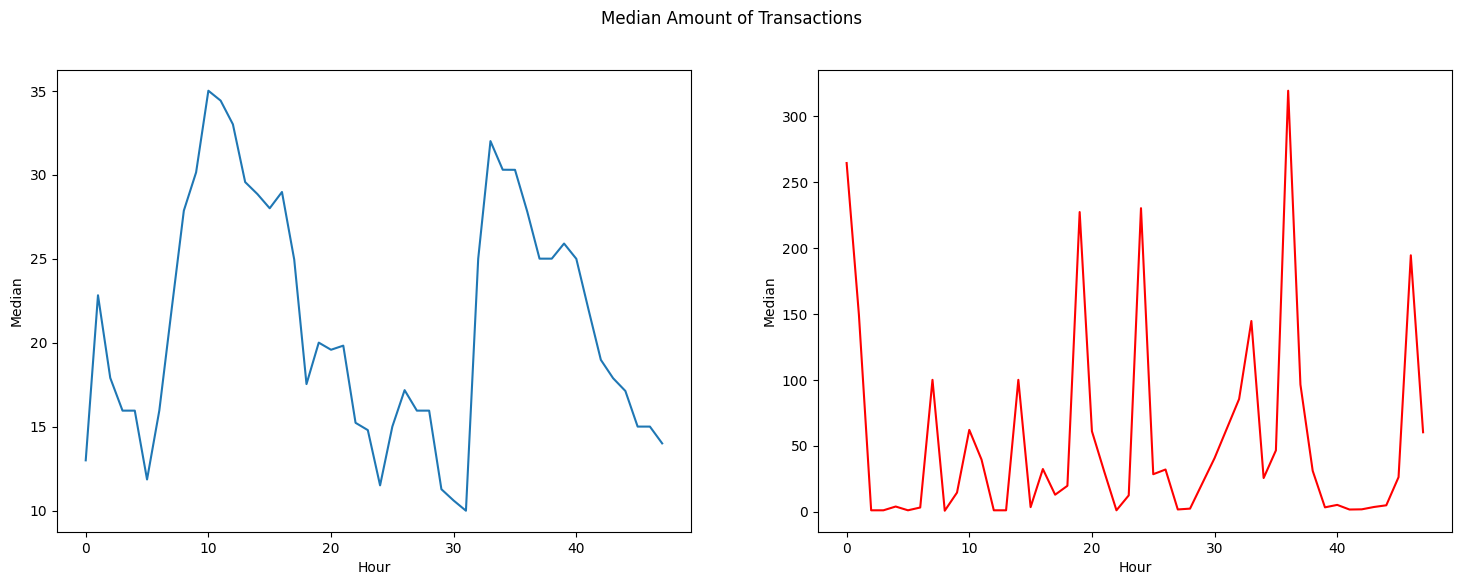

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

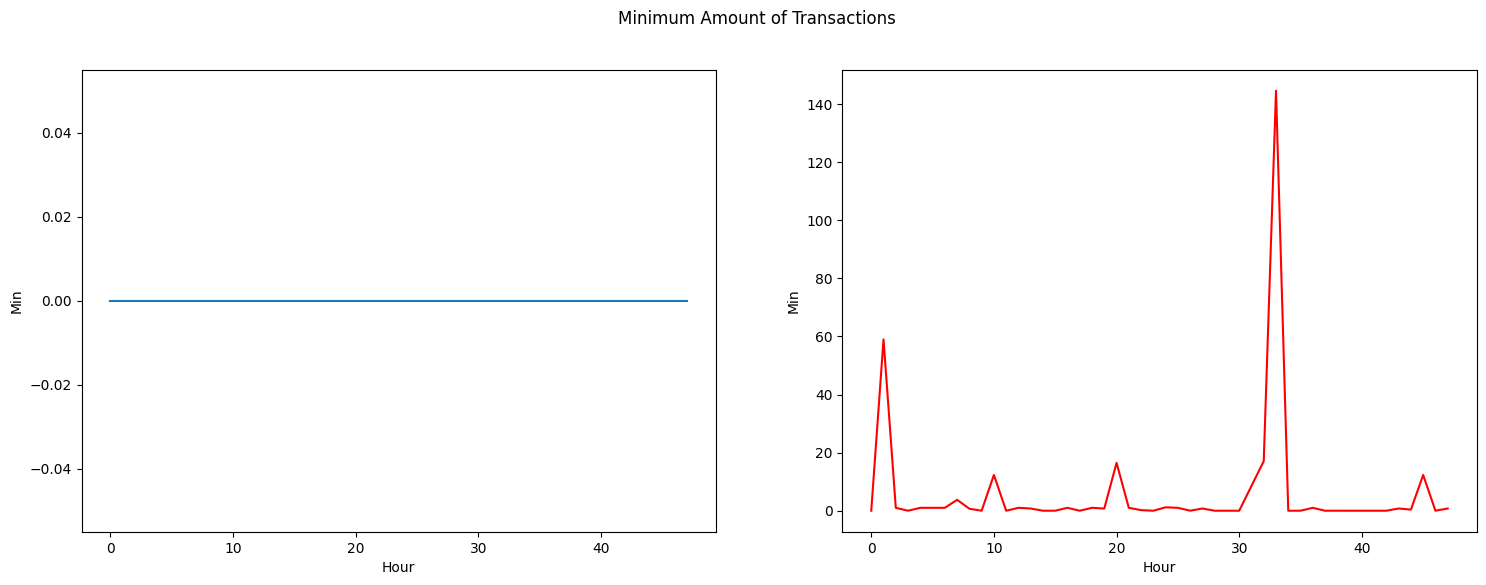

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

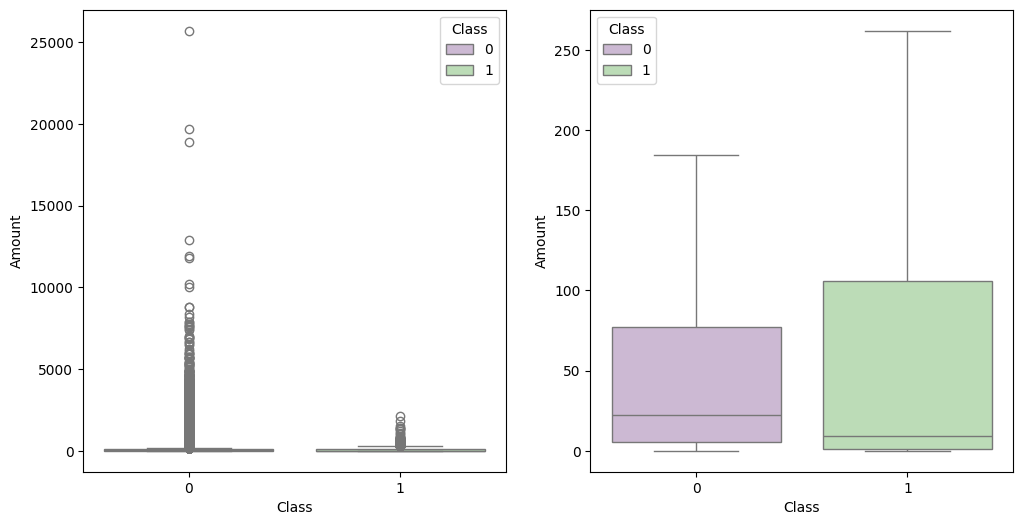

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=False)
plt.show();


In [142]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Subplot: con y sin outliers
fig = make_subplots(rows=1, cols=2, subplot_titles=["With Outliers", "Without Outliers"])

# Con outliers
fig.add_trace(
    go.Box(
        x=data_df["Class"].astype(str),
        y=data_df["Amount"],
        boxpoints='outliers',
        marker_color='green',
        name="With Outliers"
    ),
    row=1, col=1
)

# Sin outliers
fig.add_trace(
    go.Box(
        x=data_df["Class"].astype(str),
        y=data_df["Amount"],
        boxpoints=False,
        marker_color='purple',
        name="Without Outliers"
    ),
    row=1, col=2
)

# Layout
fig.update_layout(
    title="Transaction Amount Distribution by Class",
    height=500,
    width=1000,
    showlegend=False
)

# Guardar como HTML en la carpeta images
fig.write_html("images/boxplot_amount_by_class.html")

In [20]:
tmp = data_df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [21]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

In [22]:
fraud = data_df.loc[data_df['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

In [143]:
import plotly.graph_objects as go

# Filtrar solo transacciones fraudulentas
fraud = data_df.loc[data_df['Class'] == 1]

# Crear gráfico
trace = go.Scatter(
    x=fraud['Time'],
    y=fraud['Amount'],
    mode="markers",
    name="Amount",
    marker=dict(
        color='rgb(238,23,11)',
        line=dict(color='red', width=1),
        opacity=0.5
    ),
    text=fraud['Amount']
)

fig = go.Figure(data=[trace])

fig.update_layout(
    title='Amount of Fraudulent Transactions',
    xaxis=dict(title='Time [s]', showticklabels=True),
    yaxis=dict(title='Amount'),
    hovermode='closest',
    height=500,
    width=900
)

# Guardar como archivo HTML en la carpeta 'images'
fig.write_html("images/fraud_amount_scatter.html")

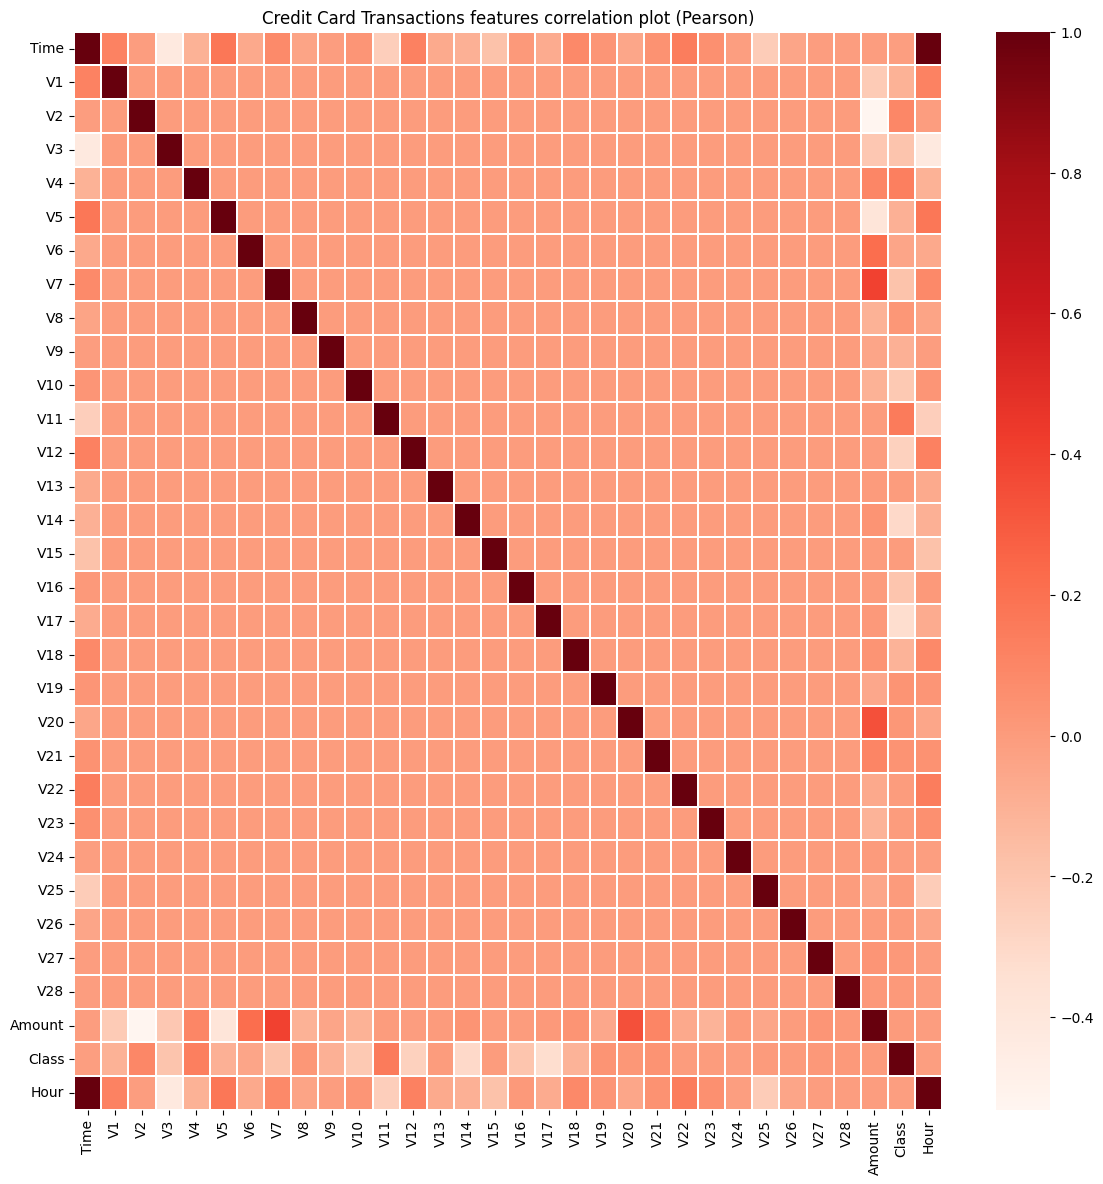

In [23]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,14))
plt.title('Credit Card Transactions Features Correlation Plot (Pearson)')
corr = data_df.corr()

# Crear heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap="Reds")

# Guardar la figura en carpeta images
plt.savefig("images/feature_correlation.png", bbox_inches='tight')
plt.close()

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

Let's plot the correlated and inverse correlated values on the same graph.

Let's start with the direct correlated values: {V20;Amount} and {V7;Amount}.

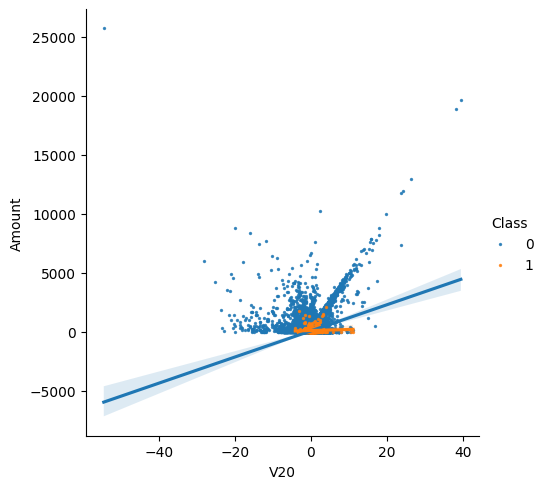

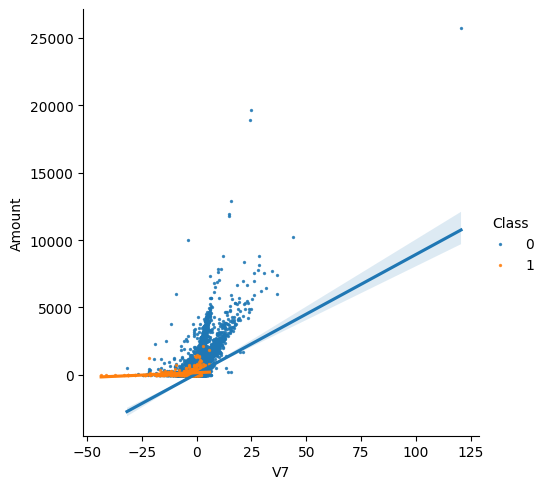

In [24]:
s = sns.lmplot(x='V20', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

In [145]:
import seaborn as sns

# Primer gráfico: V20 vs Amount
s1 = sns.lmplot(x='V20', y='Amount', data=data_df, hue='Class', fit_reg=True, scatter_kws={'s': 2})
s1.fig.suptitle("V20 vs Amount", y=1.03)  # Opcional: título
s1.savefig("images/v20_amount_lmplot.png")
plt.close()

# Segundo gráfico: V7 vs Amount
s2 = sns.lmplot(x='V7', y='Amount', data=data_df, hue='Class', fit_reg=True, scatter_kws={'s': 2})
s2.fig.suptitle("V7 vs Amount", y=1.03)  # Opcional: título
s2.savefig("images/v7_amount_lmplot.png")
plt.close()

We can confirm that the two couples of features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).

Let's plot now the inverse correlated values.

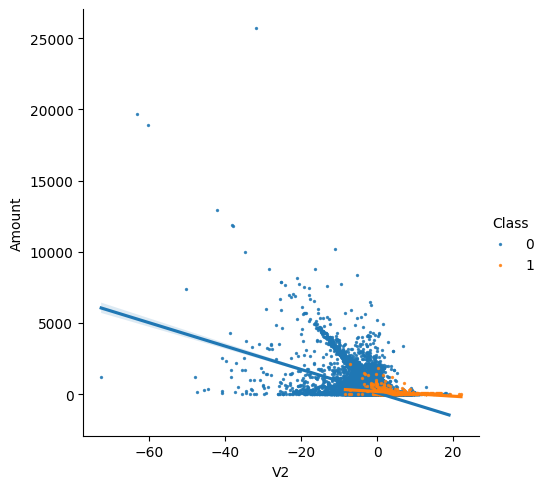

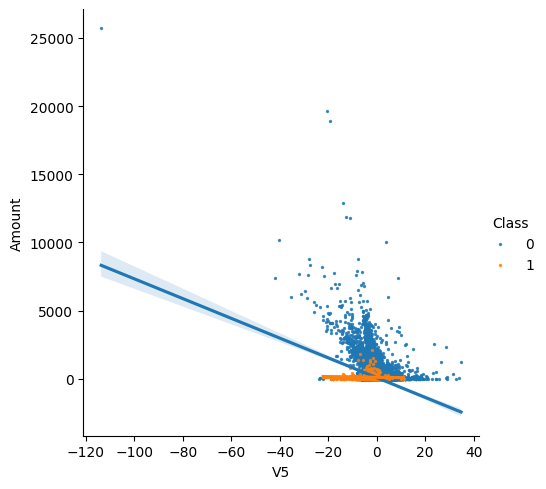

In [25]:
s = sns.lmplot(x='V2', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=data_df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).

C:\Users\luisb\AppData\Local\Temp\ipykernel_2232\955923673.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\luisb\AppData\Local\Temp\ipykernel_2232\955923673.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\luisb\AppData\Local\Temp\ipykernel_2232\955923673.py:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\luisb\AppData\Local\Temp\ipykernel_2232\955923673.py:15: UserWarning:



The `bw` parameter is de

<Figure size 640x480 with 0 Axes>

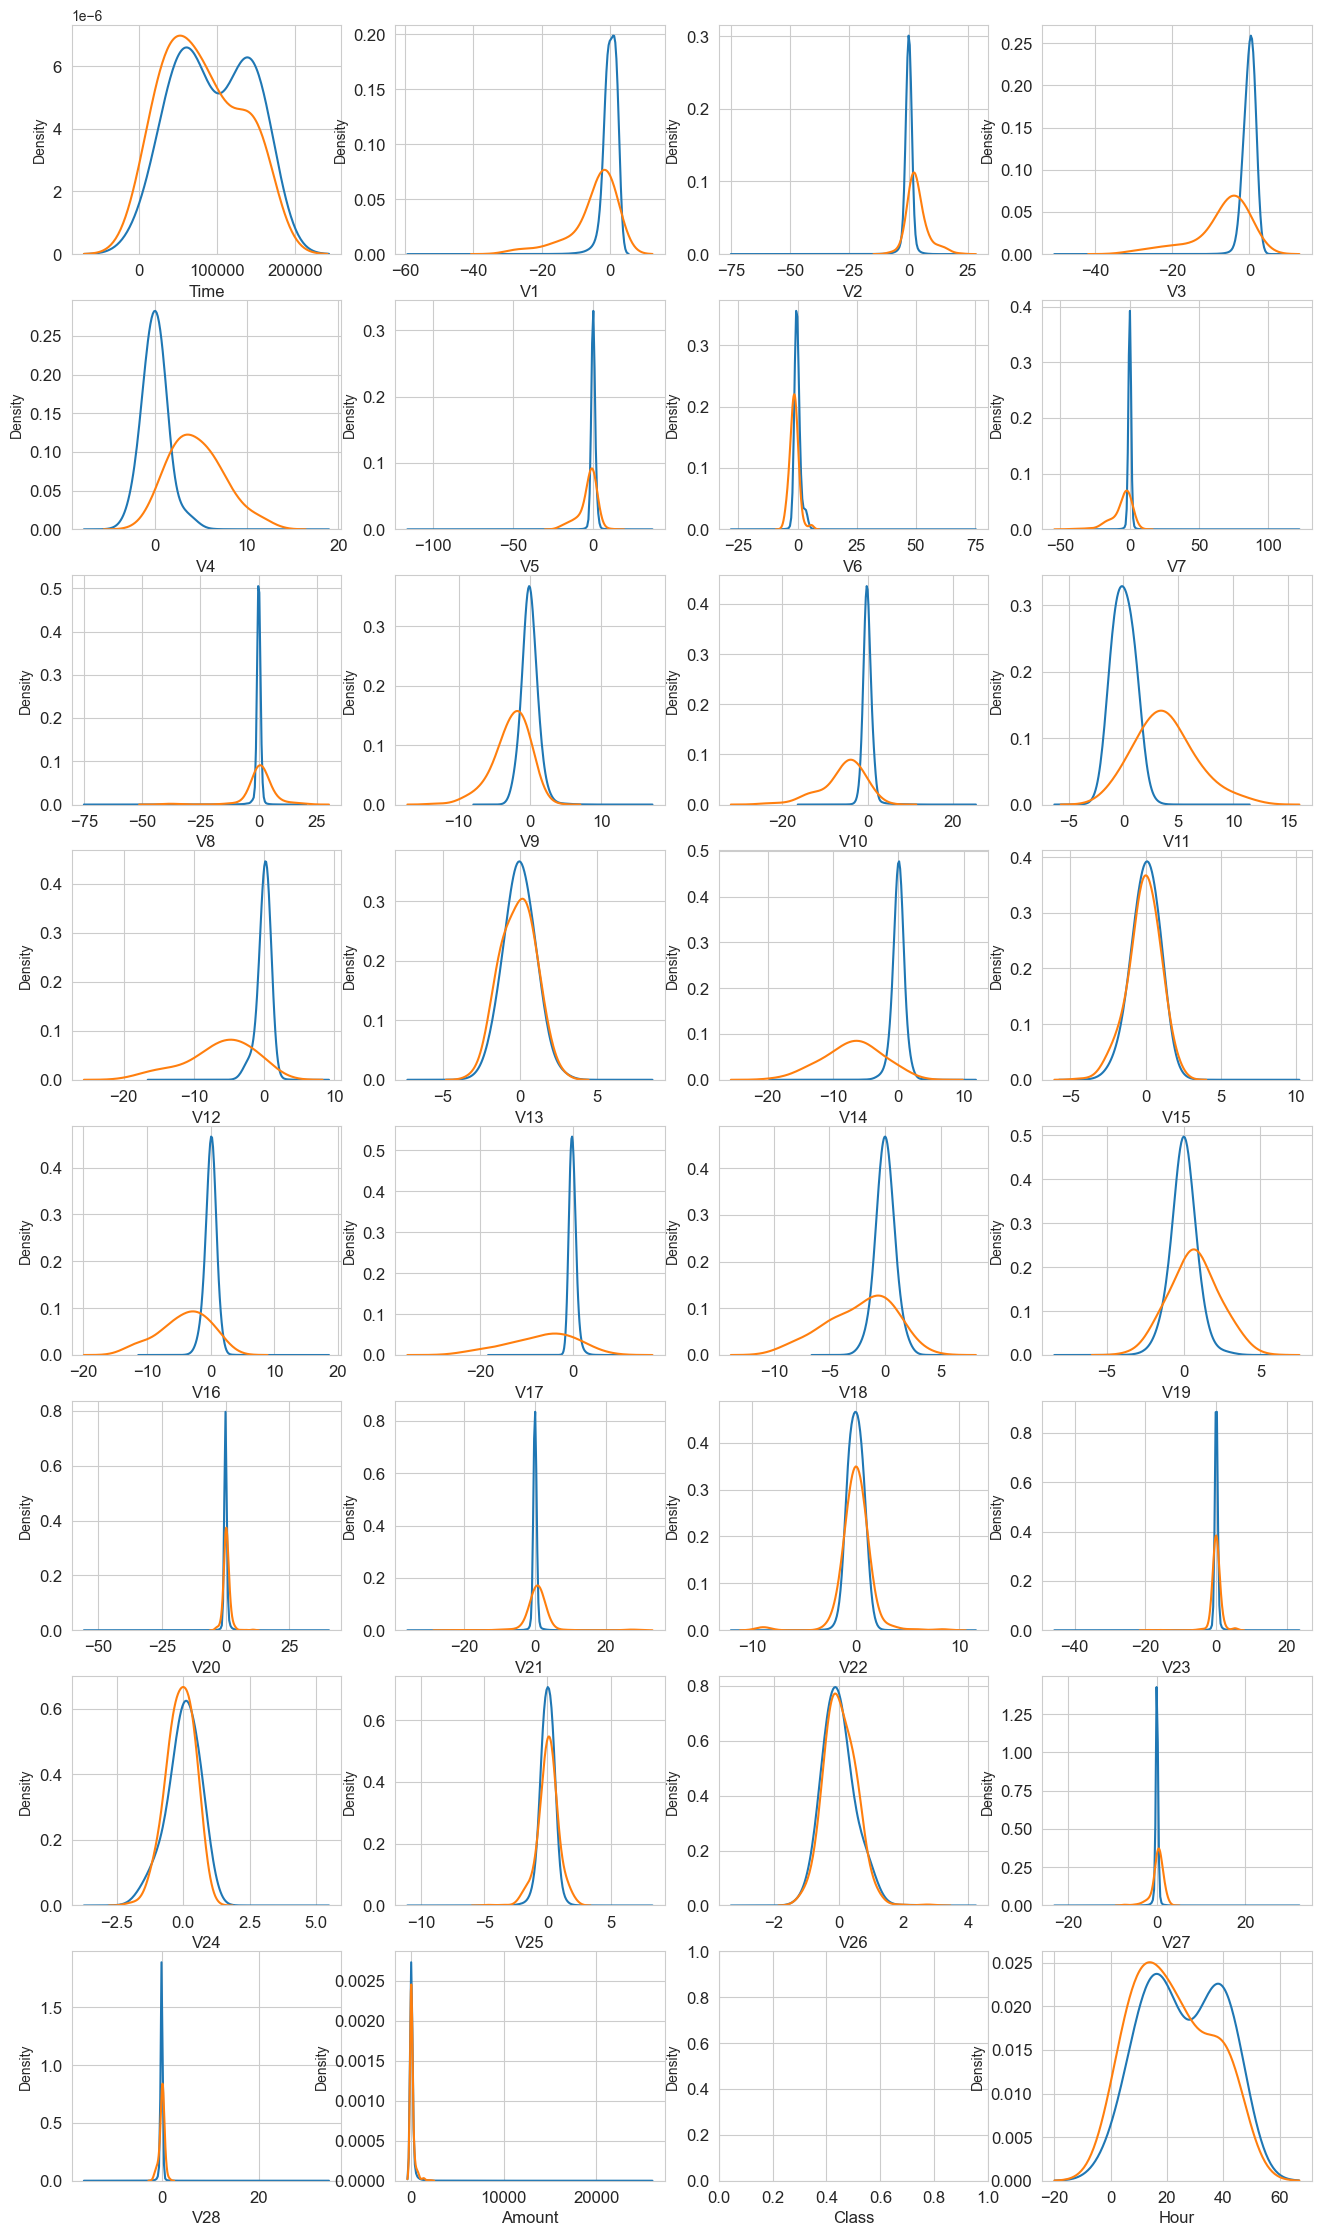

In [26]:
var = data_df.columns.values

i = 0
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables
var = data_df.columns.values

# Subconjuntos por clase
t0 = data_df[data_df['Class'] == 0]
t1 = data_df[data_df['Class'] == 1]

# Estilo de gráfico
sns.set_style('whitegrid')

# Crear figura
fig, ax = plt.subplots(8, 4, figsize=(20, 30))  # Ajustar tamaño
fig.suptitle('Distributions by Class', fontsize=20, y=1.02)

# Plotear cada variable
for i, feature in enumerate(var):
    row = i // 4
    col = i % 4
    sns.kdeplot(t0[feature], bw_adjust=0.5, label="Class = 0", ax=ax[row, col])
    sns.kdeplot(t1[feature], bw_adjust=0.5, label="Class = 1", ax=ax[row, col])
    ax[row, col].set_xlabel(feature, fontsize=10)
    ax[row, col].tick_params(axis='both', labelsize=10)

# Ajustes de layout
plt.tight_layout()

# Guardar imagen
plt.savefig("images/distributions_by_class.png")

# Cerrar figura
plt.close()

C:\Users\luisb\AppData\Local\Temp\ipykernel_2232\3961573988.py:22: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\luisb\AppData\Local\Temp\ipykernel_2232\3961573988.py:23: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

Predictive models¶
Define predictors and target values
Let's define the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature.

In [27]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

Split data in train, test and validation set¶
Let's define train, validation and test sets.

In [30]:
VALID_SIZE = 0.20  # Por ejemplo, 20% para validación
TEST_SIZE = 0.20   # Por ejemplo, 20% para test
RANDOM_STATE = 42  # Semilla para reproducibilidad

In [31]:
train_df, test_df = train_test_split(data_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True)
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True)

RandomForestClassifier
Define model parameters¶
Let's set the parameters for the model.

Let's run a model using the training set for training. Then, we will use the validation set for validation.

We will use as validation criterion GINI, which formula is GINI = 2 * (AUC) - 1, where AUC is the Receiver Operating Characteristic - Area Under Curve (ROC-AUC) [4]. Number of estimators is set to 100 and number of parallel jobs is set to 4.

We start by initializing the RandomForestClassifier.

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Parámetros para Random Forest
RFC_METRIC = 'gini'          # o 'entropy'
NUM_ESTIMATORS = 100         # número de árboles
NO_JOBS = -1                 # usa todos los núcleos disponibles
RANDOM_STATE = 42            # semilla para reproducibilidad

# Definir el modelo
clf = RandomForestClassifier(
    n_jobs=NO_JOBS,
    random_state=RANDOM_STATE,
    criterion=RFC_METRIC,
    n_estimators=NUM_ESTIMATORS,
    verbose=False
)

In [35]:
clf.fit(train_df.drop("Class", axis=1), train_df["Class"])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
predictors = [col for col in train_df.columns if col != "Class"]
X_train = train_df[predictors]
y_train = train_df["Class"]

clf.fit(X_train, y_train)

# Guardar esta lista para predecir más adelante
saved_predictors = X_train.columns.tolist()

In [38]:
X_valid = valid_df[saved_predictors]
preds = clf.predict(X_valid)

C:\Users\luisb\AppData\Local\Temp\ipykernel_2232\3992975389.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



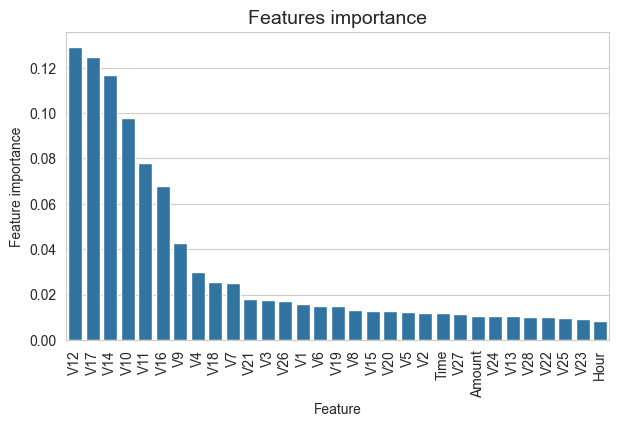

In [39]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

The most important features are V17, V12, V14, V10, V11, V16.

Confusion matrix
Let's show a confusion matrix for the results we obtained.

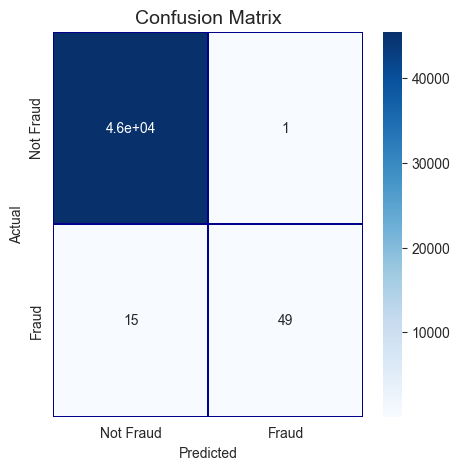

In [40]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Type I error and Type II error
We need to clarify that confussion matrix are not a very good tool to represent the results in the case of largely unbalanced data, because we will actually need a different metrics that accounts in the same time for the selectivity and specificity of the method we are using, so that we minimize in the same time both Type I errors and Type II errors.

Null Hypothesis (H0) - The transaction is not a fraud.
Alternative Hypothesis (H1) - The transaction is a fraud.

Type I error - You reject the null hypothesis when the null hypothesis is actually true.
Type II error - You fail to reject the null hypothesis when the the alternative hypothesis is true.

Cost of Type I error - You erroneously presume that the the transaction is a fraud, and a true transaction is rejected.
Cost of Type II error - You erroneously presume that the transaction is not a fraud and a ffraudulent transaction is accepted.

The following image explains what Type I error and Type II error are:

In [41]:
roc_auc_score(valid_df[target].values, preds)

0.8828015121964619

In [42]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [49]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(
    n_estimators=100,
    random_state=42,
    algorithm='SAMME.R'  # Este sí es válido en scikit-learn 1.7.0
)

In [50]:
clf = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)

In [51]:
print(clf.algorithm)  # Debería imprimir 'SAMME.R'

deprecated


In [52]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)

In [53]:
import sklearn
print(sklearn.__version__)

1.7.0


In [54]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)

In [55]:
clf.fit(train_df[predictors], train_df[target].values)

,estimator,None
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42


C:\Users\luisb\AppData\Local\Temp\ipykernel_2232\3562096361.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



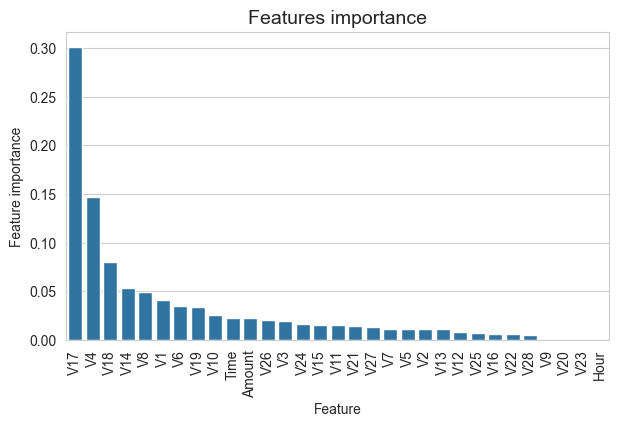

In [56]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame con importancia de características
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)

# Crear figura
plt.figure(figsize=(10, 6))  # Tamaño un poco más grande para mejor legibilidad
plt.title('Feature Importances', fontsize=16)
s = sns.barplot(x='Feature', y='Feature importance', data=tmp, palette="viridis")
s.set_xticklabels(s.get_xticklabels(), rotation=45, ha='right')  # Rotar y alinear etiquetas

# Ajustar layout
plt.tight_layout()

# Guardar imagen
plt.savefig("images/feature_importances.png")

# Cerrar figura
plt.close()

C:\Users\luisb\AppData\Local\Temp\ipykernel_2232\3530506057.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\luisb\AppData\Local\Temp\ipykernel_2232\3530506057.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



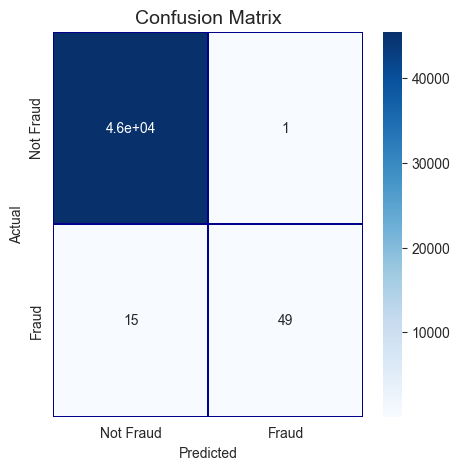

In [57]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

45569
45569


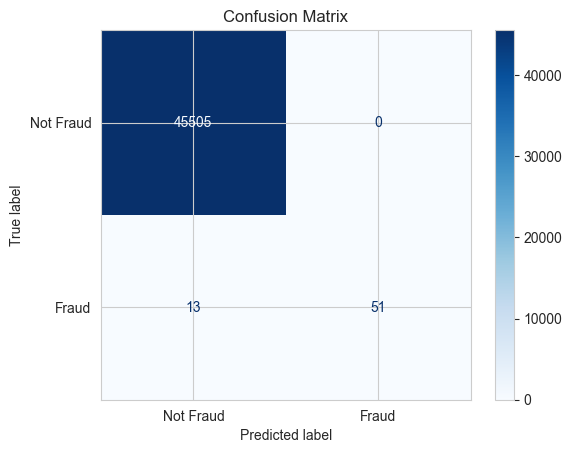

In [151]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Asegúrate de que estos coincidan:
X_valid = valid_df.drop(columns=[target])
y_valid = valid_df[target]

# Haz predicciones con el modelo
preds = clf.predict(X_valid)

# Ahora tienen la misma longitud
print(len(y_valid))  # Debe dar 45569
print(len(preds))    # También debe dar 45569

# Matriz de confusión
cm = confusion_matrix(y_valid, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig("images/confusion_matrix.png")  # Guarda como imagen
plt.show()

In [58]:
roc_auc_score(valid_df[target].values, preds)

0.8828015121964619

In [61]:
pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 7.0 MB/s eta 0:00:15
   - -------------------------------------- 2.9/102.4 MB 8.5 MB/s eta 0:00:12
   - -------------------------------------- 5.0/102.4 MB 9.2 MB/s eta 0:00:11
   -- ------------------------------------- 7.3/102.4 MB 9.6 MB/s eta 0:00:10
   --- ------------------------------------ 9.7/102.4 MB 9.9 MB/s eta 0:00:10
   ---- ----------------------------------- 12.1/102.4 MB 10.2 MB/s eta 0:00:09
   ----- ---------------------------------- 14.7/102.4 MB 10.4 MB/s eta 0:00:09
   ------ --------------------------------- 17.0/102.4 MB 10.6 MB/s eta 0:00:09
   ------- -------------------------------- 19.7/102.4 MB 10.8 MB/s eta 0:00:08
   -------- ------------------------------- 22.5/102.4 MB 10.9 MB/s eta 0:00:08
   --------- ------------------------------ 24.9/102.4 MB 11.1 MB/s eta 0:00:08
   ---------- ----------------------------- 27.8/102.4 MB 1


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
from catboost import CatBoostClassifier

In [66]:
VERBOSE_EVAL = 50

In [67]:
from catboost import CatBoostClassifier

VERBOSE_EVAL = 50  # Mostrar evaluación cada 50 iteraciones

clf = CatBoostClassifier(
    iterations=500,
    learning_rate=0.02,
    depth=12,
    eval_metric='AUC',
    random_seed=RANDOM_STATE,
    bagging_temperature=0.2,
    od_type='Iter',
    metric_period=VERBOSE_EVAL,
    od_wait=100
)

In [68]:
clf.fit(train_df[predictors], train_df[target].values,verbose=True)

0:	total: 712ms	remaining: 5m 55s
50:	total: 27.9s	remaining: 4m 5s
100:	total: 53.1s	remaining: 3m 29s
150:	total: 1m 19s	remaining: 3m 4s
200:	total: 1m 46s	remaining: 2m 37s
250:	total: 2m 12s	remaining: 2m 11s
300:	total: 2m 38s	remaining: 1m 44s
350:	total: 3m 4s	remaining: 1m 18s
400:	total: 3m 31s	remaining: 52.2s
450:	total: 3m 58s	remaining: 25.9s
499:	total: 4m 24s	remaining: 0us


In [69]:
preds = clf.predict(valid_df[predictors])

C:\Users\luisb\AppData\Local\Temp\ipykernel_2232\3562096361.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



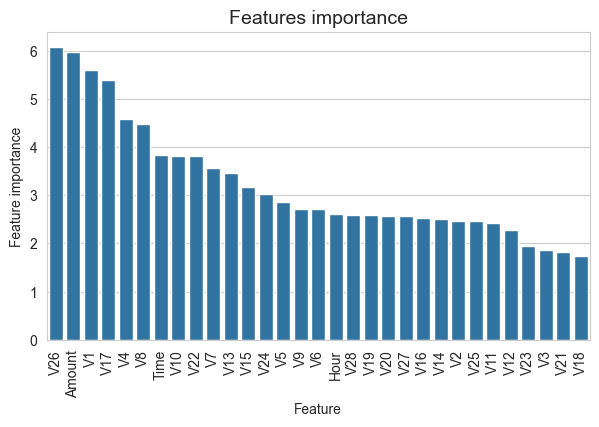

In [70]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

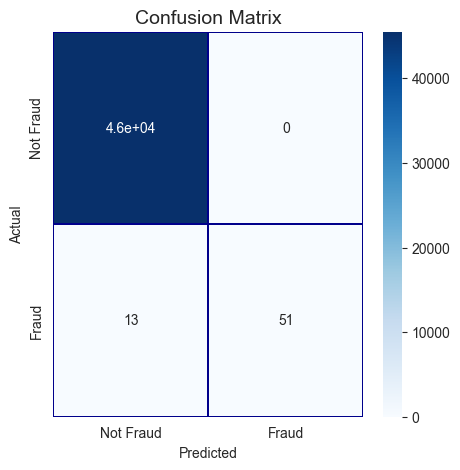

In [71]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [72]:
roc_auc_score(valid_df[target].values, preds)

0.8984375

In [77]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 5.8 MB/s eta 0:00:26
   -- ------------------------------------- 11.0/150.0 MB 35.9 MB/s eta 0:00:04
   --- ------------------------------------ 13.6/150.0 MB 26.2 MB/s eta 0:00:06
   ----- ---------------------------------- 20.7/150.0 MB 27.5 MB/s eta 0:00:05
   ------ --------------------------------- 26.0/150.0 MB 27.7 MB/s eta 0:00:05
   ------- -------------------------------- 28.6/150.0 MB 24.4 MB/s eta 0:00:05
   ---------- ----------------------------- 40.1/150.0 MB 28.8 MB/s eta 0:00:04
   ------------ --------------------------- 46.9/150.0 MB 29.0 MB/s eta 0:00:04
   --------------- ------------------------ 57.9/150.0 MB 31.6 MB/s eta 0:00:03
   ------------------ --------------------- 67.6/150.0 MB 33.0 MB/s eta 0:00:03
   -------------------- ------------------- 77.1/150.0 MB 34.0 MB/s eta 0:00:03
   ---------------------- ----------------- 86.0/15


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import xgboost as xgb

In [79]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [81]:
import xgboost as xgb

# Hiperparámetros
MAX_ROUNDS = 1000         # Máximo número de iteraciones (boosting rounds)
EARLY_STOP = 50           # Número de rondas sin mejora antes de detenerse
VERBOSE_EVAL = 50         # Cada cuántas rondas imprimir resultados

# Convertir a DMatrix (formato de XGBoost optimizado)
dtrain = xgb.DMatrix(train_df[predictors], label=train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], label=valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], label=test_df[target].values)

# Qué monitorear durante el entrenamiento
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Parámetros de XGBoost
params = {
    'objective': 'binary:logistic',
    'eta': 0.039,
    'max_depth': 2,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'eval_metric': 'auc',
    'seed': 2018,
    'verbosity': 1  # usa 0 para silencioso, 1 para normal
}

# Entrenamiento del modelo
model = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=MAX_ROUNDS,
                  evals=watchlist,
                  early_stopping_rounds=EARLY_STOP,
                  maximize=True,
                  verbose_eval=VERBOSE_EVAL)

# Predicción sobre el set de prueba
preds = model.predict(dtest)

# Evaluar desempeño
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_df[target], preds)
print(f"AUC del modelo XGBoost en test: {auc:.4f}")

[0]	train-auc:0.91928	valid-auc:0.92769
[50]	train-auc:0.98451	valid-auc:0.97555
[97]	train-auc:0.98928	valid-auc:0.97726
AUC del modelo XGBoost en test: 0.9747


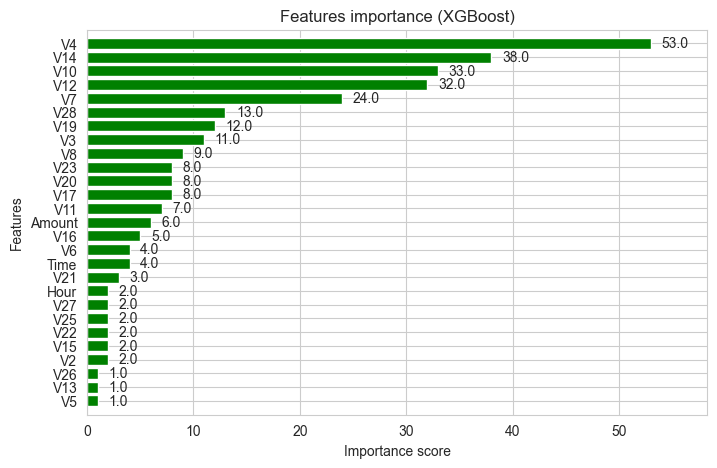

In [82]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [83]:
preds = model.predict(dtest)

In [84]:
roc_auc_score(test_df[target].values, preds)

0.9747255894479345

In [85]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced 
         }

In [88]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.5 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 9.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
import lightgbm as lgb

In [90]:
dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)

In [95]:
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  num_boost_round=MAX_ROUNDS,
                  callbacks=[
                      lgb.record_evaluation(evals_results),
                      lgb.early_stopping(EARLY_STOP),
                      lgb.log_evaluation(period=VERBOSE_EVAL)
                  ])

Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.997474	valid's auc: 0.957244
Early stopping, best iteration is:
[3]	train's auc: 0.98522	valid's auc: 0.959433


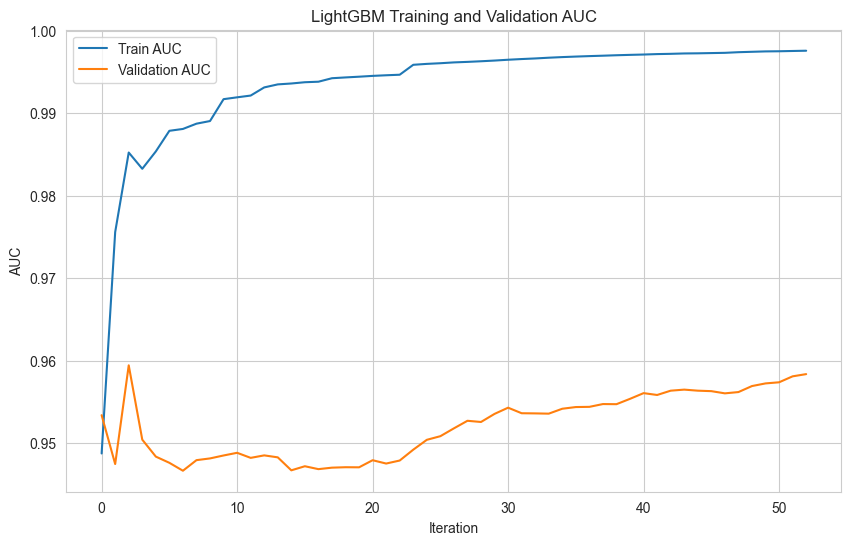

In [97]:
import matplotlib.pyplot as plt

# Asegúrate que evals_results tiene los datos guardados
train_auc = evals_results['train']['auc']
valid_auc = evals_results['valid']['auc']

plt.figure(figsize=(10,6))
plt.plot(train_auc, label='Train AUC')
plt.plot(valid_auc, label='Validation AUC')
plt.xlabel('Iteration')
plt.ylabel('AUC')
plt.title('LightGBM Training and Validation AUC')
plt.legend()
plt.grid(True)
plt.show()

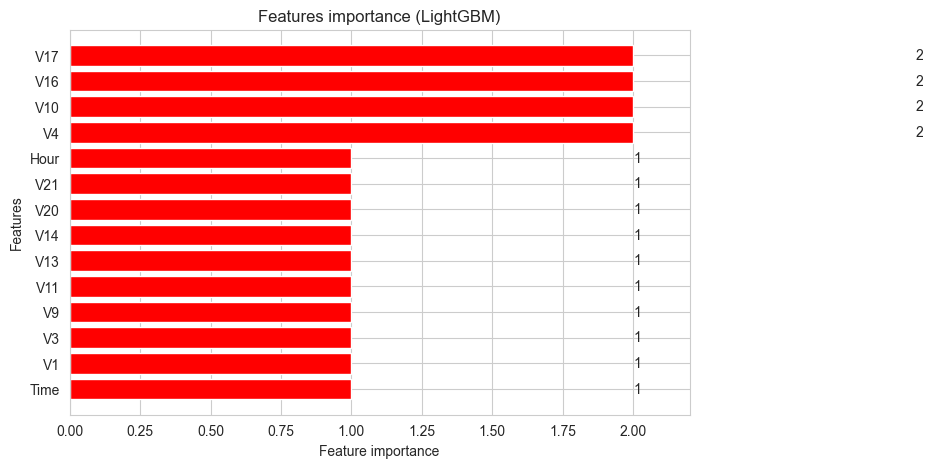

In [100]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

Conclusions¶
We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated two predictive models. The data was split in 3 parts, a train set, a validation set and a test set. For the first three models, we only used the train and test set.

We started with RandomForrestClassifier, for which we obtained an AUC scode of 0.85 when predicting the target for the test set.

We followed with an AdaBoostClassifier model, with lower AUC score (0.83) for prediction of the test set target values.

We then followed with an CatBoostClassifier, with the AUC score after training 500 iterations 0.86.

We then experimented with a XGBoost model. In this case, se used the validation set for validation of the training model. The best validation score obtained was 0.984. Then we used the model with the best training step, to predict target value from the test data; the AUC score obtained was 0.974.

We then presented the data to a LightGBM model. We used both train-validation split and cross-validation to evaluate the model effectiveness to predict 'Class' value, i.e. detecting if a transaction was fraudulent. With the first method we obtained values of AUC for the validation set around 0.974. For the test set, the score obtained was 0.946.
With the cross-validation, we obtained an AUC score for the test prediction of 0.93.